In [1]:
## Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
## upload arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
df = pd.read_excel("AdventureWorks.xlsx")

In [5]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
df.shape

(904, 16)

In [8]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [10]:
## Qual a receita total?  
df["Valor Venda"].sum()

5984606.1426

In [11]:
# Qual o custo total?
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [12]:
## Qual o custo total?
round(df["custo"].sum(),2)

2486783.05

In [13]:
df["lucro"] = df["Valor Venda"] - df["custo"]

In [14]:
round(df["lucro"].sum(),2)

3497823.09

In [17]:
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [18]:
df["Tempo Envio"].mean()

8.543141592920353

In [19]:
df.groupby("Marca")["Tempo Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [21]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo Envio       0
dtype: int64

In [24]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [25]:
pd.options.display.float_format = '{:20,.2f}'.format

In [26]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [27]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [28]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

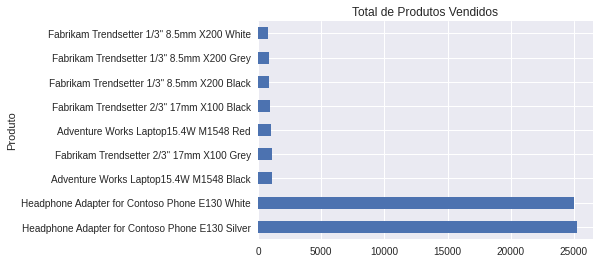

In [29]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).plot.barh(title="Total de Produtos Vendidos")

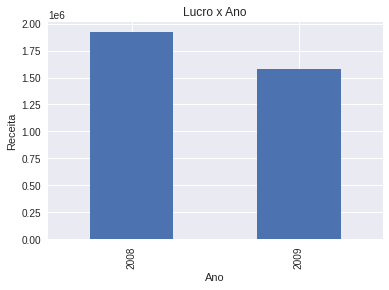

In [30]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [31]:
df_2009 = df[df["Data Venda"].dt.year == 2009]

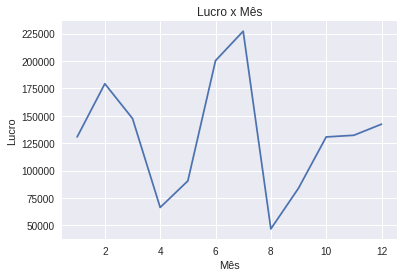

In [33]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title = "Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

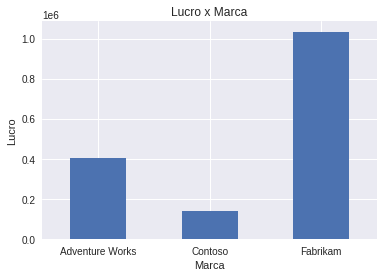

In [35]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title = "Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

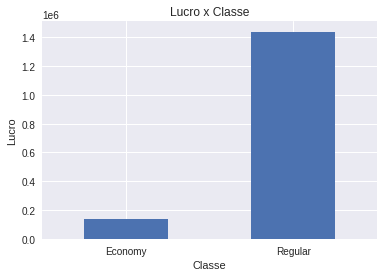

In [36]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title = "Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [37]:
df["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

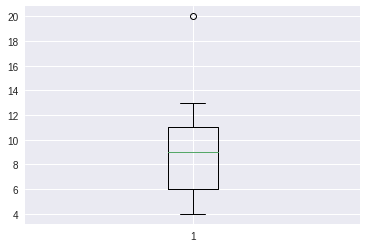

In [39]:
## graficos boxplot
plt.boxplot(df["Tempo Envio"]);

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <a list of 10 Patch objects>)

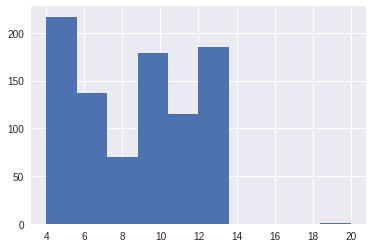

In [40]:
plt.hist(df["Tempo Envio"])

In [41]:
df["Tempo Envio"].min()

4

In [43]:
df[df["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [44]:
df.to_csv('df_vendas_novo.csv', index=False)